# CMSE 802 In-class assignment: Web Crawler
## Date: 10/18/2018
## Due: 10/18/2018; 10:30 PM

## The goal of this assignment is to learn how a web crawler works.

---
### Your name: Boyao Zhu

---
### 1. A walk through HTML 

Please open http://www.msu.edu. 

You can find how to view html source code for different web browsers at the link below.

https://www.computerhope.com/issues/ch000746.htm

If you are using chrome as your browser, you can follow along by opening the developer tools (three bars on the upper right corner > more tools > Developer Tools) 

---
### 2. Web Crawling and web scraping

Now we know what web crawling and web scraping are. It is time to put our knowledge to use.

Please investigate which python libraries could be used for web crawling/scraping. Don't forget to indicate what  they do.

** Your answer: **
1. The Requests library is vital to add to your data science toolkit. It’s a simple yet powerful HTTP library, which means you can use it to access web pages.

2. urllib

---
### 3. Crawler example
Consider the code at the link below. Review the code and answer the questions below.

http://www.netinstructions.com/how-to-make-a-web-crawler-in-under-50-lines-of-python-code/

What modules do we need and what do they do?

** Your answer: **
3

the first one is to look for the begining of a link
the second is a function that we are creating to get links
the last is spider, typically, it takes in an url, a word to find and the number of papges to search through before giving up

---
### 4. Web Crawler Code
The code is modified from the example in the link earlier.

In [1]:
# load modules
from html.parser import HTMLParser  
from urllib.request import urlopen  
from urllib import parse


In [2]:
# We are going to create a class called LinkParser that inherits some
# methods from HTMLParser which is why it is passed into the definition
class LinkParser(HTMLParser):

    # This is a function that HTMLParser normally has
    # but we are adding some functionality to it
    def handle_starttag(self, tag, attrs):
        
        # We are looking for the begining of a link. Links normally look
        # like <a href="www.someurl.com"></a>
        if tag == 'a':
            for (key, value) in attrs:
                if key == 'href':
                    
                    # We are grabbing the new URL. We are also adding the base URL to it. 
                    # For example:
                    # www.netinstructions.com is the base and
                    # somepage.html is the new URL (a relative URL)
                    #
                    # We combine a relative URL with the base URL to create
                    # an absolute URL like:
                    # www.netinstructions.com/somepage.html
                    newUrl = parse.urljoin(self.baseUrl, value)
                    
                    # And add it to our collection of links:
                    self.links = self.links + [newUrl]

    # This is a new function that we are creating to get links
    # that our spider() function will call
    def getLinks(self, url):
        self.links = []
        
        # Remember the base URL which will be important when creating
        # absolute URLs
        self.baseUrl = url
        
        # Use the urlopen function from the standard Python 3 library
        response = urlopen(url)
        
        # Make sure that we are looking at HTML and not other things that
        # are floating around on the internet (such as
        # JavaScript files, CSS, or .PDFs for example)
        if 'text/html' in response.getheader('Content-Type'):
            htmlBytes = response.read()
            
            # Note that feed() handles Strings well, but not bytes
            # (A change from Python 2.x to Python 3.x)
            htmlString = htmlBytes.decode("utf-8")
            self.feed(htmlString)
            return htmlString,self.links #htmlString, self.links
        
        if 'text/plain' in response.getheader('Content-Type'):
            return url,[]
        else:
            return "",[]

# And finally here is our spider. It takes in an URL, a word to find,
# and the number of pages to search through before giving up
def spider(url, word, maxPages):  
    pagesToVisit = [url]
    numberVisited = 0
    foundWord = False
    
    # The main loop. Create a LinkParser and get all the links on the page.
    # Also search the page for the word or string
    # In our getLinks function we return the web page
    # (this is useful for searching for the word)
    # and we return a set of links from that web page
    # (this is useful for where to go next)
    while numberVisited < maxPages and pagesToVisit != [] and not foundWord:
        numberVisited = numberVisited +1
        
        # Start from the beginning of our collection of pages to visit:
        url = pagesToVisit[0]
        pagesToVisit = pagesToVisit[1:]
        try:
            print(numberVisited, "Visiting:", url)
            parser = LinkParser()
            data, links = parser.getLinks(url)
            pagesToVisit = pagesToVisit + links
            if data.find(word)>-1:
                foundWord = True
                
                # Add the pages that we visited to the end of our collection
                # of pages to visit:
                print(" **Success!**")
        except:
            print(" **Failed!**")
    if foundWord:
        print("The word", word, "was found at", url)
    else:
        print("Word never found")

In [3]:
spider('http://www.msu.edu', 'Computational Mathematics', 40)

1 Visiting: http://www.msu.edu
2 Visiting: http://www.msu.edu#js-global-header
3 Visiting: http://www.msu.edu#main
4 Visiting: http://www.msu.edu#hero__video-control
5 Visiting: http://www.msu.edu#js-global-footer
6 Visiting: http://www.msu.edu
7 Visiting: http://www.msu.edu/
8 Visiting: http://www.msu.edu/about/index.php
9 Visiting: http://www.msu.edu
10 Visiting: http://www.msu.edu
11 Visiting: http://www.msu.edu/about/thisismsu/facts.php
12 Visiting: http://www.msu.edu/about/rankings-and-recognitions.php
13 Visiting: https://spartansuccess.msu.edu/
14 Visiting: http://www.inclusion.msu.edu/
15 Visiting: http://www.msu.edu/visit/index.php
16 Visiting: http://www.msu.edu/about/thisismsu/board-admin/index.php
17 Visiting: http://trustees.msu.edu/
18 Visiting: http://president.msu.edu/
19 Visiting: https://msu.edu/presidentialsearch/
20 Visiting: https://provost.msu.edu/
21 Visiting: https://msu.edu/presidentialsearch/
22 Visiting: https://admissions.msu.edu/
23 Visiting: http://www.msu

---
### 5.  Spider 2
As a group, discuss the above code and modify it to **not** stop when the keyword is found but instead continue until it has viewed maxPages. The result will be a second spider (i.e., a new function spider2). Please provide the code for it below.

In [24]:
## your code:

def spider2(url, word, maxPages): 
     
    pagesToVisit = [url]
    numberVisited = 0
    foundWord = False
    a = []
    b = []
    # The main loop. Create a LinkParser and get all the links on the page.
    # Also search the page for the word or string
    # In our getLinks function we return the web page
    # (this is useful for searching for the word)
    # and we return a set of links from that web page
    # (this is useful for where to go next)
    while numberVisited < maxPages and pagesToVisit != []: # and not foundWord:
        numberVisited = numberVisited +1
        
        # Start from the beginning of our collection of pages to visit:
        url = pagesToVisit[0]
        pagesToVisit = pagesToVisit[1:]
        
        try:
            print(numberVisited, "Visiting:", url)
            parser = LinkParser()
            data, links = parser.getLinks(url)
            pagesToVisit = pagesToVisit + links
            if data.find(word)>-1:
                foundWord = True
                a.append(url)
                b.append(numberVisited)
                # Add the pages that we visited to the end of our collection
                # of pages to visit:
                print(" **Success!**")
        except:
            print(" **Failed!**")
    if foundWord:
        for i in range(len(a)):
            print("The word", word, "was found at", a[i], "on page", b[i])
    else:
        print("Word never found")


In [25]:
## Now run it to see how it works:
spider2('https://www.msu.edu', 'Computational Mathematics', 40)

1 Visiting: https://www.msu.edu
2 Visiting: https://www.msu.edu#js-global-header
3 Visiting: https://www.msu.edu#main
4 Visiting: https://www.msu.edu#hero__video-control
5 Visiting: https://www.msu.edu#js-global-footer
6 Visiting: https://www.msu.edu
7 Visiting: https://www.msu.edu/
8 Visiting: https://www.msu.edu/about/index.php
9 Visiting: https://www.msu.edu
10 Visiting: https://www.msu.edu
11 Visiting: https://www.msu.edu/about/thisismsu/facts.php
12 Visiting: https://www.msu.edu/about/rankings-and-recognitions.php
13 Visiting: https://spartansuccess.msu.edu/
14 Visiting: http://www.inclusion.msu.edu/
15 Visiting: https://www.msu.edu/visit/index.php
16 Visiting: https://www.msu.edu/about/thisismsu/board-admin/index.php
17 Visiting: http://trustees.msu.edu/
18 Visiting: http://president.msu.edu/
19 Visiting: https://msu.edu/presidentialsearch/
20 Visiting: https://provost.msu.edu/
21 Visiting: https://msu.edu/presidentialsearch/
22 Visiting: https://admissions.msu.edu/
23 Visiting: 

---
### 6. Spider 3
As a group, modify spinder2 to generate a graph object of the web network that the spider2 has crawled. The result will be a third spider.

In [136]:
## Your code:
import networkx as nx
import matplotlib.pyplot as plt

def spider3(url, word, maxPages):
    g = nx.Graph()
    pagesToVisit = [url]
    pagesVisited = [url]
    numberVisited = 0
    #pagesToVisited = [url]
    # The main loop. Create a LinkParser and get all the links on the page.
    # Also search the page for the word or string
    # In our getLinks function we return the web page
    # (this is useful for searching for the word)
    # and we return a set of links from that web page
    # (this is useful for where to go next)
    while numberVisited < maxPages and pagesToVisit != []: # and not foundWord:
        numberVisited = numberVisited +1
        
        # Start from the beginning of our collection of pages to visit:
        url = pagesToVisit[0]
        pagesVisited.append(url) 
        
        pagesToVisit = pagesToVisit[1:]
        
        if url not in pagesVisited:
            g.add_node(url)
       
        
        #print(numberVisited, "Visiting:", url)
        parser = LinkParser()
        data, links = parser.getLinks(url)
        pagesToVisit = pagesToVisit + links
       
        for n in range(len(links)):
            g.add_node(links[n])
            g.add_edge(url,links[n])
    return g 


In [137]:
## Now run it to see how it works. For this task, let's only crawl 10 pages.
G = spider3('http://www.msu.edu', 'Computational Mathematics', 10)

** 1. Generate the adjacency list and matrix **

** 2. Draw the graph **

** 3. Calculate the PageRank scores **

** 4. Find the highest and lowest PR scores **

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


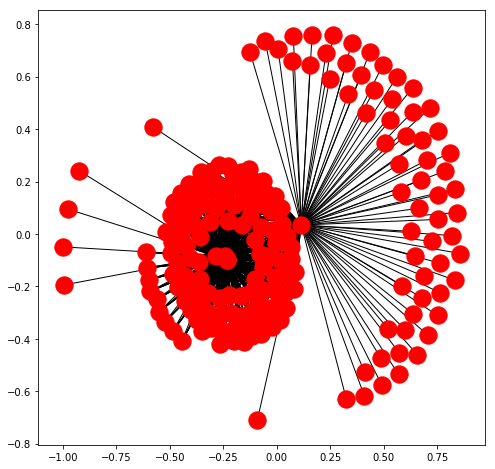

max pagerank =  tel:(517) 355-1855
min pagerank =  http://adminsv.msu.edu 


In [139]:
# Your code:


# adjacent list and matrix
print(nx.to_numpy_matrix(G))

# draw network
plt.figure(figsize=(8,8));
#nx.draw_circular(G)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
plt.show()





pr = nx.pagerank(G)

# find max and min PR


print('max pagerank = ', max(pr))
print('min pagerank = ', min(pr))

### Congratulations, we're done!

** Don't forget to add your names to the top!!**

Log into the course D2L website (d2l.msu.edu) and go to "Assessments > Dropbox > In-class Assignment 20171019".